In [228]:
import networkx as nx

# Create a graph
G = nx.Graph()

# Add edges to the graph
G.add_edges_from([(1, 2), (2, 3), (3, 4)])  # Replace with your graph's edges

# Initialize a dictionary to store the count of each edge
edge_count = {}

# Iterate over all pairs of nodes
for node1 in G.nodes():
    for node2 in G.nodes():
        if node1 < node2:
            # Check if there is a path between the nodes
            if nx.has_path(G, node1, node2):
                # Calculate the shortest path between the nodes
                shortest_path = nx.shortest_path(G, node1, node2)
                # Increment the count for each edge in the shortest path
                for i in range(len(shortest_path) - 1):
                    edge = (shortest_path[i], shortest_path[i + 1])
                    undirected_edge = tuple(sorted(edge))
                    edge_count[undirected_edge] = edge_count.get(undirected_edge, 0) + 1

# Print the count of each edge
print(edge_count)



{(1, 2): 3, (2, 3): 4, (3, 4): 3}


{(1, 5): 14, (2, 5): 14, (3, 5): 14, (4, 5): 14, (5, 6): 50, (5, 7): 50, (6, 8): 14, (6, 9): 14, (6, 10): 14, (6, 11): 14, (7, 12): 14, (7, 13): 14, (7, 14): 14, (7, 15): 14}


/tmp/ipykernel_21732/3986668331.py:57: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  edge_collection = nx.draw_networkx_edges(
/tmp/ipykernel_21732/3986668331.py:73: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical', pad=0.01)


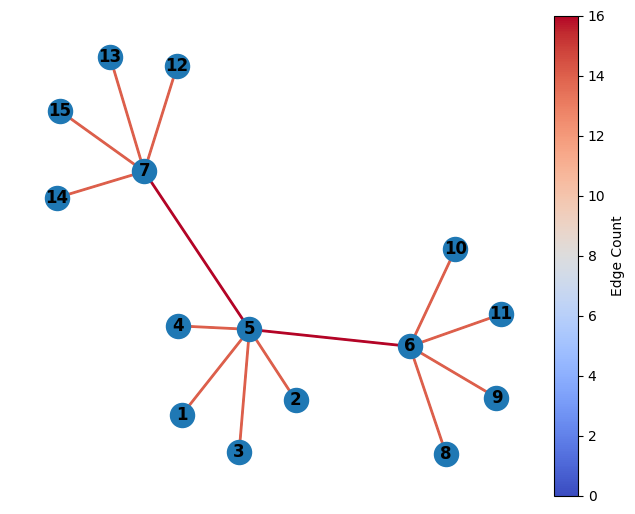

In [288]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Create a graph
G = nx.Graph()
#edges=[(1, 4),(2,4),(3,4),(4,5),(5,8),(5,7),(5,6),(5,9),(4,10)] #illustrated real graph
#edges=[(1,4),(2,4),(3,4),(4,5),(4,6),(4,7),(4,8),(4,9),(4,10)]
edges=((1,2),(2,3),(2,4)) #4 nodes, GUS
edges=((1,2),(2,3),(3,4)) #4 nodes, NOJGUS
edges=[(1,3),(2,3),(3,4),(3,5),(3,6)] #6 nodes GUS 
#edges=[(1,3),(2,3),(3,4),(4,5),(4,6)] #6 bodes NONGUS
#edges=[(1,3),(2,3),(3,4),(3,5),(3,6),(3,7),(3,8)] #8 nodes gus
#edges=[(1,3),(2,3),(3,4),(3,5),(5,6),(5,7),(5,8)] #8 nodes nongus
#edges=[(1, 4),(2,4),(3,4),(4,5),(5,8),(5,7),(5,6),(5,9),(4,10)] #10 nodes nongus
#edges=[(1,2),(1,3),(1,4),(1,5),(1,6),(1,7),(1,8),(1,9),(1,10)] #10 nodes gus
#edges=[(1,2),(1,3),(1,4),(1,5),(1,6),(1,7),(1,8),(1,9),(1,10),(1,11),(1,12)] #12 nodes gus
#edges=[(1, 4),(2,4),(3,4),(4,5),(5,8),(5,7),(5,6),(5,9),(4,10),(11,4),(12,5)] #12 nodes nongus
#edges=[(1,2),(1,3),(1,4),(1,5),(1,6),(1,7),(1,8),(1,9),(1,10),(1,11),(1,12),(1,14),(1,15)] #14 nodes gus
#edges=[(1, 4),(2,4),(3,4),(4,5),(5,8),(5,7),(5,6),(5,9),(4,10),(11,4),(12,5),(13,5),(14,4)] #14 nodes nongus

edges= [(1,2),(2,3),(2,4),(4,5),(4,6),(2,7),(7,8),(7,9)] #9 nodes, nongus
edges=[(1,3),(2,3),(3,4),(3,5),(3,6),(3,7),(3,8),(3,9)] #9 nodes Gus
edges=[(1,4),(2,4),(3,4),(4,5),(4,9),(5,6),(5,7),(5,8),(9,10),(9,11),(9,12)] #12 nodes nongus
edges=[(1,4),(2,4),(3,4),(4,5),(4,6),(4,7),(4,8),(4,9),(4,10),(4,11),(4,12)] #12 edges gus
edges=[(1,5),(2,5),(3,5),(4,5),(5,6),(5,7),(5,8),(5,9),(5,10),(5,11),(5,12),(5,13),(5,14),(5,15)] #15 edges gus
edges=[(1,5),(2,5),(3,5),(4,5),(5,6),(5,7),(6,8),(6,9),(6,10),(6,11),(7,12),(7,13),(7,14),(7,15)] #15 edges nongus
# Add edges to the graph
G.add_edges_from(edges)  # Replace with your graph's edges

# Initialize a dictionary to store the count of each edge
edge_count = {}

# Iterate over all pairs of nodes
for node1 in G.nodes():
    for node2 in G.nodes():
        if node1 < node2:
            # Check if there is a path between the nodes
            if nx.has_path(G, node1, node2):
                # Calculate the shortest path between the nodes
                shortest_path = nx.shortest_path(G, node1, node2)
                # Increment the count for each edge in the shortest path
                for i in range(len(shortest_path) - 1):
                    edge = (shortest_path[i], shortest_path[i + 1])
                    undirected_edge = tuple(sorted(edge))
                    edge_count[undirected_edge] = edge_count.get(undirected_edge, 0) + 1
print(edge_count)
# Create a list of edge colors based on edge_count
#edge_colors = [edge_count[edge] for edge in G.edges()]
edge_colors=[edge_count[edge] for edge in edge_count]
# Draw the graph with edge colors
pos = nx.spring_layout(G)  # You can use different layout algorithms
nx.draw(G, pos, with_labels=True, font_weight='bold')
node_col="gray"
# Use draw_networkx_edges to draw edges with the color map
edge_collection = nx.draw_networkx_edges(
    G,
    pos,
    edgelist=G.edges(),
    edge_color=edge_colors,
    edge_cmap=plt.cm.coolwarm,
    width=2.0,
    edge_vmin=0,
    edge_vmax=16
)

# Create a colorbar legend
sm = ScalarMappable(cmap=plt.cm.coolwarm, norm=Normalize(vmin=0, vmax=16))
sm.set_array([])  # You need to set a dummy array for the scalar mappable

# Add the colorbar to the plot
cbar = plt.colorbar(sm, orientation='vertical', pad=0.01)
cbar.set_label('Edge Count')

# Show the plot
plt.show()


In [226]:
print(edge_count)
print(edge_count[(1,4)])
print([edge_count[edge] for edge in edge_count])
[edge_count[edge] for edge in G.edges()]


{(1, 4): 7, (2, 4): 7, (3, 4): 7, (4, 5): 16, (5, 8): 7, (5, 7): 7, (5, 6): 7}
7
[7, 7, 7, 16, 7, 7, 7]


KeyError: (4, 2)